In [1]:
import comtradeapicall 
import sys
sys.path.append("..")

import pandas as pd
import matplotlib.pyplot as plt
from module.mq_comtrade import MQ_COMTRADE
from module.util_plot import *
from module.common import *

subscription_key = ''
comTrade= MQ_COMTRADE(subscription_key)
print("从UN comTrade 获取数据比较缓慢，请耐心等待，如果无法访问，请考虑科学上网")

从UN comTrade 获取数据比较缓慢，请耐心等待，如果无法访问，请考虑科学上网


In [2]:
WorldCode = '0'
CHNCode= '156'
USACode= '842'
parentCmdCode = 84
cmdArr = ['8443', '8472', '8452']

years = [2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]
year1 = years[0];year2= years[-1]

total = comTrade.get_final_with_years(years, reporterCode=USACode, partnerCode=WorldCode, cmdArr=[], flowCode='M', freqCode='A')
total.index=total.period


In [3]:
df = comTrade.get_final_with_years(years, reporterCode=USACode, partnerCode=None, cmdArr=cmdArr, flowCode='M', freqCode='A')
for i in df.index:
    y = df.loc[i]['period']
    df.loc[i,'ratio'] = df.loc[i]['primaryValue']/total.loc[y]['primaryValue']
len(df)

2000

cmdCode 8443: Printing machinery; used for printing by means of plates, cylinders and other printing components of heading 84.42; other printers, copying machines and facsimile machines, whether or not combined; parts and accessories thereof
cmdCode 8472: Office machines; not elsewhere classified
cmdCode 8452: Sewing machines; other than book-sewing machines of heading no. 8440; furniture, bases and covers specially designed for sewing machines; sewing machine needles


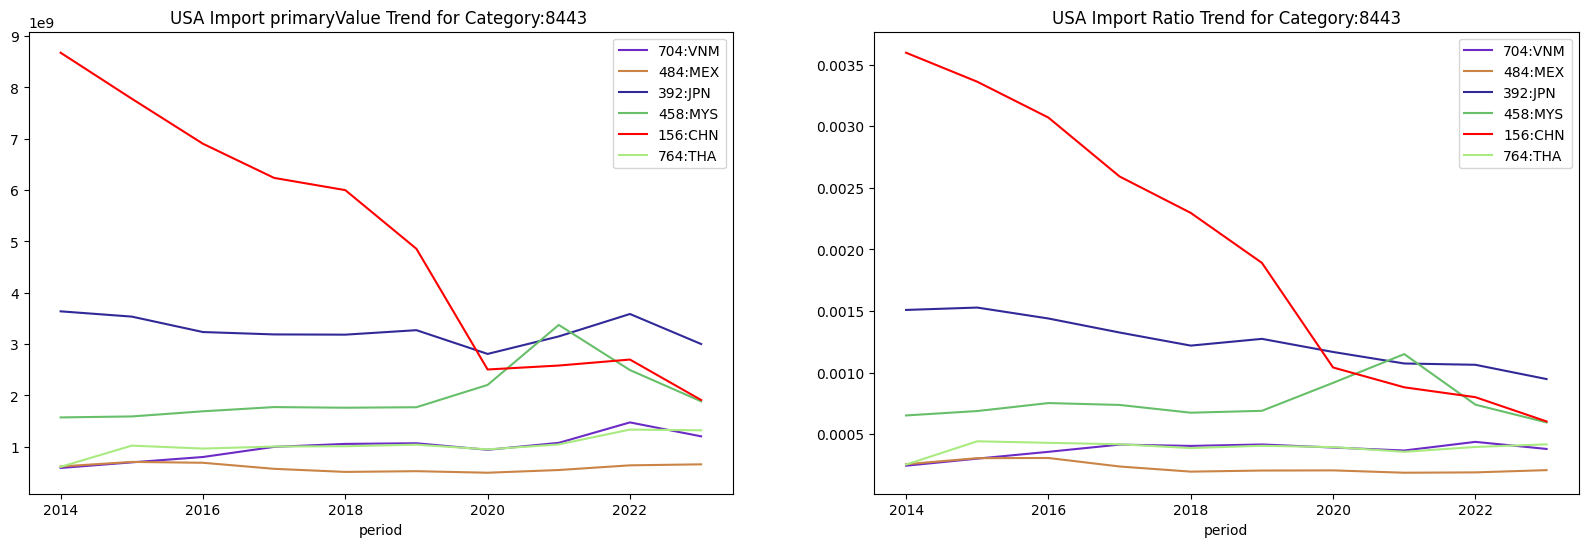

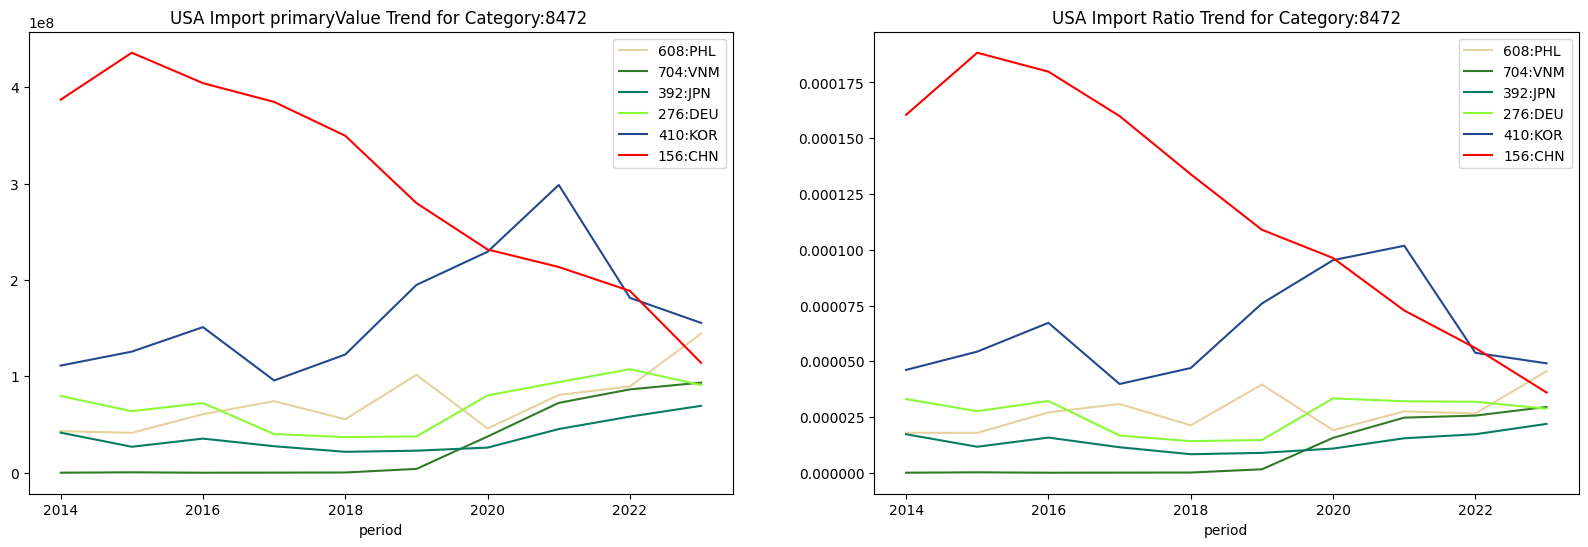

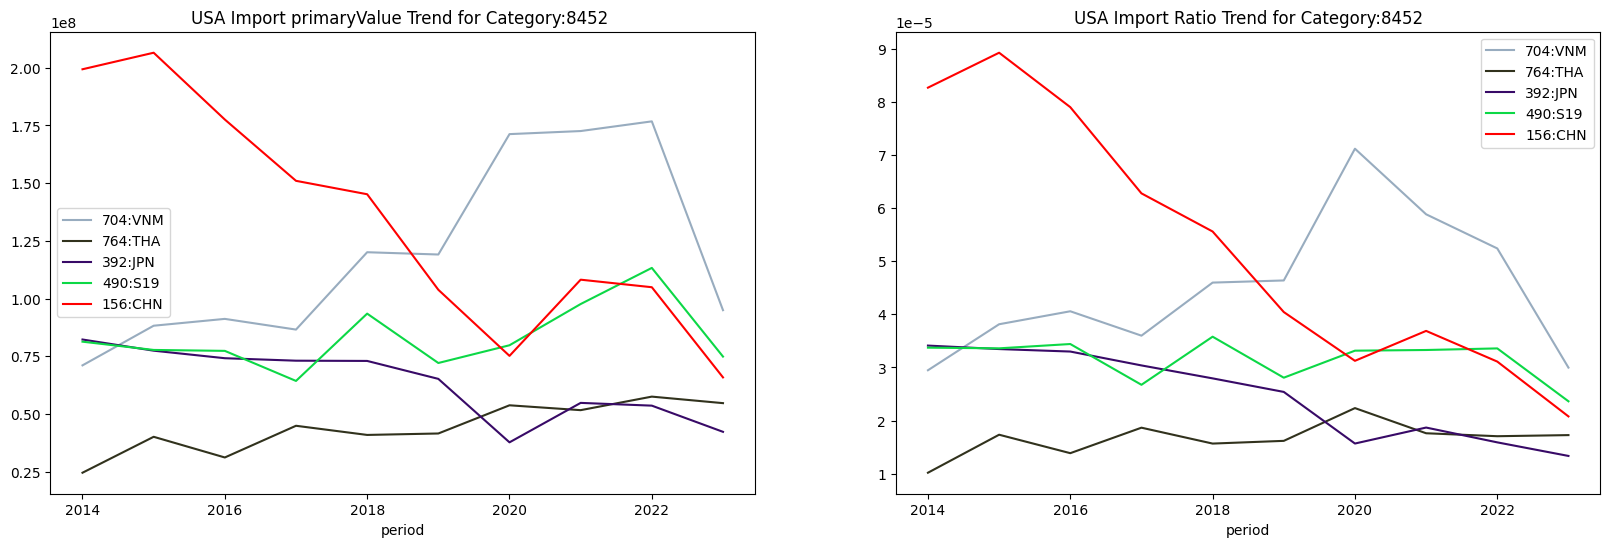

In [4]:
N=5
for cmd in cmdArr:
    dd = df[df['partnerCode']!=0]
    dc = dd[dd['cmdCode']==f'{int(cmd):04d}']
    print(f'cmdCode {cmd}: {dc.iloc[0]["cmdDesc"]}')
    pc1 = dc[dc['period']==str(year1)].sort_values(by='primaryValue', ascending=False).head(N)['partnerCode'].tolist()
    pc2 =dc[dc['period']==str(year2)].sort_values(by='primaryValue', ascending=False).head(N)['partnerCode'].tolist()
    partnerArr = list(set(pc1+pc2))

    plt.figure(figsize=(20,6))
    # colorArr = random_colorArr(len(partnerArr))
    for partner in partnerArr:
        dp = dc[dc['partnerCode']==partner]
        dp.index=dp.period
        name = f"{partner}:{dp.iloc[0]['partnerISO']}"
        color= 'r' if (str(partner) == str(CHNCode)) else random_color()
        plt.subplot(1,2,1)
        s = dp['primaryValue']
        s.name = name
        s.plot(legend=True, color= color, title=f'USA Import primaryValue Trend for Category:{cmd} ')
        plt.subplot(1,2,2)
        s = dp['ratio']
        s.name = name
        s.plot(legend=True, color= color, title=f'USA Import Ratio Trend for Category:{cmd}')